# The Cancer Gene Atlas Cancer (TCGA) - Lung Squamous Cell Carcinoma (LUSC)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Mon Apr 30 17:19:41 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Lung squamous cell carcinoma [LUSC]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-94-A5I4,3746,LUSC,TCGA,442C412D-6CC5-4FFD-810C-C94C8E643BD6,94,61.0,Bronchial,283,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,Liver,Hepatocellular Carcinoma,Prior Malignancy,2006.0,NaN,NaN
TCGA-18-3415,3762,LUSC,TCGA,9a874b64-d0d6-416e-97bc-e9071ed0b16b,18,77.0,R-Upper,39,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,1975.0,NaN,NaN
TCGA-18-3416,3763,LUSC,TCGA,6eb61cab-8e83-4c18-a59a-ae0985ec9d2e,18,83.0,L-Upper,39,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy","Arm, Other","Other, specify, Other, specify","Prior Malignancy, Prior Malignancy",NaN,NaN,NaN
TCGA-18-3409,3764,LUSC,TCGA,b09e872a-e837-49ec-8a27-84dcdcabf347,18,74.0,L-Upper,39,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy","Forehead, Lung","Other, specify, Basaloid Squamous Cell","Prior Malignancy, Synchronous Malignancy",1974.0,NaN,NaN
TCGA-18-3411,3765,LUSC,TCGA,f1a1bbf9-4751-4fb4-8a2b-19f8d4ba57bd,18,63.0,R-Upper,39,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(504, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_LUSC_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,21912089-1e42-4bcc-9ad9-fe9a9b88fb09,e9b56bfa-07b5-4950-a865-95189c18d0ad,4f109454-e7e8-4c8a-ae31-5a097e456f91,794345b3-cdf9-43b4-b938-3d8d8d5d2b79,874182dd-3824-4b91-abbe-b50024d7837c,7942a792-07d0-4a92-bc44-d700cb8178e2,0e6c1c9b-0ebf-45ac-9d1f-49a826a04d8c,1eda753f-09e3-456e-a1c6-78abf7193dfa,ce3a3af7-3820-4a24-9d54-7c9f2a4cd678,e197cdea-ee95-4867-80e0-d92cc3f3649f,...,3503bcf1-aa85-449b-acd7-4b6d8ef50c7a,497f4769-82c0-4e7e-9b2b-a7c06685b0e7,3cf4b161-2cf2-418e-88ca-c1c7c35fa41b,feffa1ea-68d2-40c0-a4d0-b3f57180fab2,c08388a7-45a6-4410-8666-e2814dabe29a,db2b2257-fc4d-467a-a813-cc3e0ba696fa,a6ab5e33-d455-4659-b712-2f54eb4a0c6a,72afca96-9956-4edc-bad0-23ef2cc00f02,7e0b2fce-4977-4760-bde3-8a648fe4a89d,16fd7d5c-2d97-4541-962f-8f584b3e9157
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,444.459000,114.065000,177.092000,187.742000,72.002500,89.00010,237.315000,131.65100,179.555000,159.24200,...,325.675000,138.758000,309.3720,116.608000,163.242000,188.0530,178.250000,121.14000,105.28200,108.31400
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,96.940300,23.710400,31.378200,69.949800,72.531100,61.15400,66.043400,42.16190,56.145800,48.63440,...,13.416400,20.572200,45.7253,59.416800,53.756800,30.1747,31.454600,73.68050,54.98080,48.25820
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,31.519400,16.450800,33.069800,17.885100,8.660550,20.03670,25.942100,17.90640,12.031400,10.01630,...,38.769100,45.667000,21.0610,12.716600,29.882300,24.0524,20.951300,22.03740,15.66320,15.42010
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,106.611000,55.090700,57.759900,280.410000,84.225300,71.51580,92.425400,56.56130,67.765800,109.46700,...,84.021600,74.440200,91.6849,140.648000,71.955800,52.2417,40.994000,127.16000,17.69290,15.87280
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.334182,0.361963,0.291397,0.705051,0.704245,2.24625,0.083943,1.02684,0.685617,1.06916,...,0.242176,0.108194,0.0000,0.167527,0.295868,0.0000,0.576888,1.14805,1.33952,2.02072


In [19]:
matrix.shape

(199169, 555)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,21912089-1e42-4bcc-9ad9-fe9a9b88fb09,e9b56bfa-07b5-4950-a865-95189c18d0ad,4f109454-e7e8-4c8a-ae31-5a097e456f91,794345b3-cdf9-43b4-b938-3d8d8d5d2b79,874182dd-3824-4b91-abbe-b50024d7837c,7942a792-07d0-4a92-bc44-d700cb8178e2,0e6c1c9b-0ebf-45ac-9d1f-49a826a04d8c,1eda753f-09e3-456e-a1c6-78abf7193dfa,ce3a3af7-3820-4a24-9d54-7c9f2a4cd678,e197cdea-ee95-4867-80e0-d92cc3f3649f,...,3503bcf1-aa85-449b-acd7-4b6d8ef50c7a,497f4769-82c0-4e7e-9b2b-a7c06685b0e7,3cf4b161-2cf2-418e-88ca-c1c7c35fa41b,feffa1ea-68d2-40c0-a4d0-b3f57180fab2,c08388a7-45a6-4410-8666-e2814dabe29a,db2b2257-fc4d-467a-a813-cc3e0ba696fa,a6ab5e33-d455-4659-b712-2f54eb4a0c6a,72afca96-9956-4edc-bad0-23ef2cc00f02,7e0b2fce-4977-4760-bde3-8a648fe4a89d,16fd7d5c-2d97-4541-962f-8f584b3e9157
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,444.459000,114.065000,177.092000,187.742000,72.002500,89.00010,237.315000,131.65100,179.555000,159.24200,...,325.675000,138.758000,309.3720,116.608000,163.242000,188.0530,178.250000,121.14000,105.28200,108.31400
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,96.940300,23.710400,31.378200,69.949800,72.531100,61.15400,66.043400,42.16190,56.145800,48.63440,...,13.416400,20.572200,45.7253,59.416800,53.756800,30.1747,31.454600,73.68050,54.98080,48.25820
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,31.519400,16.450800,33.069800,17.885100,8.660550,20.03670,25.942100,17.90640,12.031400,10.01630,...,38.769100,45.667000,21.0610,12.716600,29.882300,24.0524,20.951300,22.03740,15.66320,15.42010
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,106.611000,55.090700,57.759900,280.410000,84.225300,71.51580,92.425400,56.56130,67.765800,109.46700,...,84.021600,74.440200,91.6849,140.648000,71.955800,52.2417,40.994000,127.16000,17.69290,15.87280
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.334182,0.361963,0.291397,0.705051,0.704245,2.24625,0.083943,1.02684,0.685617,1.06916,...,0.242176,0.108194,0.0000,0.167527,0.295868,0.0000,0.576888,1.14805,1.33952,2.02072


In [22]:
matrix.shape

(79930, 555)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-94-A5I4-01,TCGA-58-A46M-01,TCGA-56-A49D-01,TCGA-43-A474-01,TCGA-43-A475-01,TCGA-56-A4BW-01,TCGA-56-A4BX-01,TCGA-58-A46L-01,TCGA-58-A46K-01,TCGA-J1-A4AH-01,...,TCGA-33-AASL-01,TCGA-33-AASB-01,TCGA-33-AAS8-01,TCGA-NK-A7XE-01,TCGA-33-AASJ-01,TCGA-33-AASI-01,TCGA-33-AASD-01,TCGA-LA-A7SW-01,TCGA-56-8623-01,TCGA-56-8623-11
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,444.459000,114.065000,177.092000,187.742000,72.002500,89.00010,237.315000,131.65100,179.555000,159.24200,...,325.675000,138.758000,309.3720,116.608000,163.242000,188.0530,178.250000,121.14000,105.28200,108.31400
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,96.940300,23.710400,31.378200,69.949800,72.531100,61.15400,66.043400,42.16190,56.145800,48.63440,...,13.416400,20.572200,45.7253,59.416800,53.756800,30.1747,31.454600,73.68050,54.98080,48.25820
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,31.519400,16.450800,33.069800,17.885100,8.660550,20.03670,25.942100,17.90640,12.031400,10.01630,...,38.769100,45.667000,21.0610,12.716600,29.882300,24.0524,20.951300,22.03740,15.66320,15.42010
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,106.611000,55.090700,57.759900,280.410000,84.225300,71.51580,92.425400,56.56130,67.765800,109.46700,...,84.021600,74.440200,91.6849,140.648000,71.955800,52.2417,40.994000,127.16000,17.69290,15.87280
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.334182,0.361963,0.291397,0.705051,0.704245,2.24625,0.083943,1.02684,0.685617,1.06916,...,0.242176,0.108194,0.0000,0.167527,0.295868,0.0000,0.576888,1.14805,1.33952,2.02072


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-94-A5I4-01,TCGA-58-A46M-01,TCGA-56-A49D-01,TCGA-43-A474-01,TCGA-43-A475-01,TCGA-56-A4BW-01,TCGA-56-A4BX-01,TCGA-58-A46L-01,TCGA-58-A46K-01,TCGA-J1-A4AH-01,...,TCGA-33-AASL-01,TCGA-33-AASB-01,TCGA-33-AAS8-01,TCGA-NK-A7XE-01,TCGA-33-AASJ-01,TCGA-33-AASI-01,TCGA-33-AASD-01,TCGA-LA-A7SW-01,TCGA-56-8623-01,TCGA-56-8623-11
ARF5,444.459000,114.065000,177.092000,187.742000,72.002500,89.00010,237.315000,131.65100,179.555000,159.24200,...,325.675000,138.758000,309.3720,116.608000,163.242000,188.0530,178.250000,121.14000,105.28200,108.31400
M6PR,96.940300,23.710400,31.378200,69.949800,72.531100,61.15400,66.043400,42.16190,56.145800,48.63440,...,13.416400,20.572200,45.7253,59.416800,53.756800,30.1747,31.454600,73.68050,54.98080,48.25820
ESRRA,31.519400,16.450800,33.069800,17.885100,8.660550,20.03670,25.942100,17.90640,12.031400,10.01630,...,38.769100,45.667000,21.0610,12.716600,29.882300,24.0524,20.951300,22.03740,15.66320,15.42010
FKBP4,106.611000,55.090700,57.759900,280.410000,84.225300,71.51580,92.425400,56.56130,67.765800,109.46700,...,84.021600,74.440200,91.6849,140.648000,71.955800,52.2417,40.994000,127.16000,17.69290,15.87280
CYP26B1,0.334182,0.361963,0.291397,0.705051,0.704245,2.24625,0.083943,1.02684,0.685617,1.06916,...,0.242176,0.108194,0.0000,0.167527,0.295868,0.0000,0.576888,1.14805,1.33952,2.02072


# Histogram of First Sample

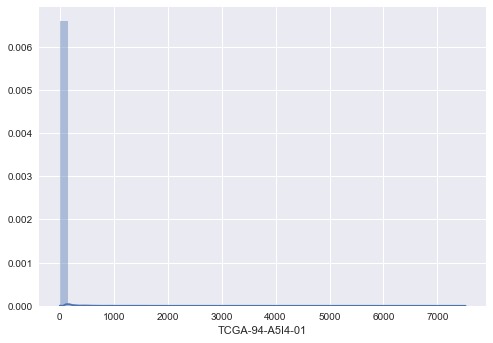

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

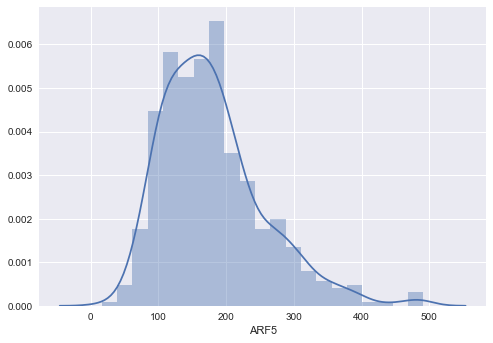

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [87]:
filename = path+'tcga_lusc_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [29]:
normalized_matrix = matrix.copy()

In [30]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [31]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [32]:
normalized_matrix.head()

,TCGA-94-A5I4-01,TCGA-58-A46M-01,TCGA-56-A49D-01,TCGA-43-A474-01,TCGA-43-A475-01,TCGA-56-A4BW-01,TCGA-56-A4BX-01,TCGA-58-A46L-01,TCGA-58-A46K-01,TCGA-J1-A4AH-01,...,TCGA-33-AASL-01,TCGA-33-AASB-01,TCGA-33-AAS8-01,TCGA-NK-A7XE-01,TCGA-33-AASJ-01,TCGA-33-AASI-01,TCGA-33-AASD-01,TCGA-LA-A7SW-01,TCGA-56-8623-01,TCGA-56-8623-11
A1BG,0.067568,0.067568,0.026157,0.067568,0.067568,0.067568,0.067568,0.033582,0.067568,0.067568,...,0.067568,0.190710,0.170569,0.067568,0.067568,0.067568,0.067568,0.067568,0.067568,0.067568
A1CF,0.010924,0.029867,0.017401,0.028065,0.042039,0.021508,0.033261,0.056497,0.056965,0.034484,...,0.032925,0.021298,0.044277,0.029038,0.046355,0.012322,0.035798,0.289622,0.039153,0.021867
A2M,37.918500,23.720900,189.610000,23.239400,101.415000,66.096100,48.552300,78.707500,38.217800,28.144700,...,7.065900,15.884300,24.333800,5.921300,11.355300,48.140100,11.011400,28.999300,1238.570000,1041.790000
A2ML1,47.368800,0.153380,0.117813,30.417500,0.585882,65.330700,8.306080,8.678470,2.429770,2.823690,...,44.446500,0.091076,0.206009,10.757800,9.517040,0.030076,0.715574,16.867200,0.121682,0.094509
A3GALT2,0.031571,0.064533,0.206908,0.024410,0.067241,0.090763,0.064533,0.016311,0.044634,0.064533,...,0.064533,0.019400,0.064533,0.024417,0.064533,0.064533,0.045315,0.050253,0.049387,0.078272


In [33]:
normalized_matrix.shape

(19128, 555)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [34]:
samples = normalized_matrix.columns.tolist()

In [35]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [36]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [37]:
normalized_matrix.columns = samples

In [38]:
normalized_matrix.head()

,TCGA-94-A5I4-01,TCGA-58-A46M-01,TCGA-56-A49D-01,TCGA-43-A474-01,TCGA-43-A475-01,TCGA-56-A4BW-01,TCGA-56-A4BX-01,TCGA-58-A46L-01,TCGA-58-A46K-01,TCGA-J1-A4AH-01,...,TCGA-33-AASL-01,TCGA-33-AASB-01,TCGA-33-AAS8-01,TCGA-NK-A7XE-01,TCGA-33-AASJ-01,TCGA-33-AASI-01,TCGA-33-AASD-01,TCGA-LA-A7SW-01,TCGA-56-8623-01,TCGA-56-8623-11
A1BG,-0.946586,-0.905580,-1.393382,-0.973670,-0.909394,-1.001121,-0.974333,-1.238620,-0.920316,-0.853808,...,-0.973866,-0.533410,-0.556267,-0.998266,-0.936295,-0.963468,-0.957019,-0.936959,-0.984390,-0.964389
A1CF,-1.737931,-1.260135,-1.570382,-1.355243,-1.115484,-1.498266,-1.282133,-1.012696,-0.994451,-1.145924,...,-1.286084,-1.485441,-1.141989,-1.365033,-1.099934,-1.702540,-1.232902,-0.304866,-1.221366,-1.454335
A2M,1.802526,1.639812,2.466895,1.562816,2.266969,1.989316,1.882137,2.131294,1.832211,1.765850,...,1.045563,1.387185,1.598043,0.944412,1.289165,1.889300,1.255084,1.695690,3.278791,3.223652
A2ML1,1.899168,-0.549551,-0.739773,1.679714,0.028677,1.984257,1.115324,1.173721,0.635510,0.767270,...,1.844233,-0.854379,-0.474281,1.203718,1.212468,-1.314990,0.067896,1.460345,-0.728903,-0.818655
A3GALT2,-1.277041,-0.925537,-0.495189,-1.415841,-0.911501,-0.872951,-0.994290,-1.552241,-1.100391,-0.873765,...,-0.993822,-1.525979,-0.978385,-1.440318,-0.956251,-0.983425,-1.130516,-1.065539,-1.120520,-0.900521


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [39]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [40]:
normalized_matrix.head()

,TCGA-94-A5I4-01,TCGA-58-A46M-01,TCGA-56-A49D-01,TCGA-43-A474-01,TCGA-43-A475-01,TCGA-56-A4BW-01,TCGA-56-A4BX-01,TCGA-58-A46L-01,TCGA-58-A46K-01,TCGA-J1-A4AH-01,...,TCGA-33-AASL-01,TCGA-33-AASB-01,TCGA-33-AAS8-01,TCGA-NK-A7XE-01,TCGA-33-AASJ-01,TCGA-33-AASI-01,TCGA-33-AASD-01,TCGA-LA-A7SW-01,TCGA-56-8623-01,TCGA-56-8623-11
A1BG,-0.996381,-0.931089,-1.390885,-0.866280,-0.984731,-1.013448,-0.928803,-1.294417,-1.041016,-1.088793,...,-0.865991,-0.419521,-0.497843,-0.872083,-0.853057,-0.776495,-0.912584,-1.013145,-0.970638,-1.034574
A1CF,-1.879426,-1.317870,-1.552093,-1.285850,-1.185821,-1.546224,-1.256013,-1.084339,-1.112978,-1.420313,...,-1.204620,-1.378659,-1.118249,-1.264626,-1.029064,-1.553728,-1.199353,-0.405720,-1.186951,-1.536477
A2M,1.771915,1.593359,2.552430,1.562765,2.292440,2.092739,1.876496,2.163487,1.778605,1.713382,...,1.235252,1.443683,1.582906,1.146042,1.306865,2.006588,1.236530,1.619346,3.340331,3.304840
A2ML1,1.872019,-0.547360,-0.745600,1.674597,-0.072163,2.087720,1.107505,1.133647,0.563982,0.657900,...,1.977412,-0.745882,-0.410402,1.384499,1.233128,-1.171885,0.176688,1.395791,-0.747232,-0.896142
A3GALT2,-1.360088,-0.949979,-0.509683,-1.348935,-0.986166,-0.892759,-0.945116,-1.588911,-1.244150,-1.106448,...,-0.883746,-1.417841,-0.941989,-1.342196,-0.874949,-0.798428,-1.095418,-1.132016,-1.086882,-0.970638


# Normalize Matrix (z-score the rows)

In [41]:
mf.zscore(normalized_matrix, 'row')

In [42]:
normalized_matrix.head()

,TCGA-94-A5I4-01,TCGA-58-A46M-01,TCGA-56-A49D-01,TCGA-43-A474-01,TCGA-43-A475-01,TCGA-56-A4BW-01,TCGA-56-A4BX-01,TCGA-58-A46L-01,TCGA-58-A46K-01,TCGA-J1-A4AH-01,...,TCGA-33-AASL-01,TCGA-33-AASB-01,TCGA-33-AAS8-01,TCGA-NK-A7XE-01,TCGA-33-AASJ-01,TCGA-33-AASI-01,TCGA-33-AASD-01,TCGA-LA-A7SW-01,TCGA-56-8623-01,TCGA-56-8623-11
A1BG,-0.597684,0.077357,-4.676402,0.747411,-0.477241,-0.774137,0.100990,-3.679032,-1.059160,-1.553118,...,0.750402,5.366377,4.556617,0.687415,0.884121,1.675677,0.268684,-0.771003,-0.331528,-0.992554
A1CF,-0.973330,0.799369,0.059983,0.900450,1.216216,0.078510,0.994638,1.536573,1.446165,0.475983,...,1.156875,0.607474,1.429526,0.967448,1.711064,0.054822,1.173501,3.678813,1.212650,0.109280
A2M,-0.896405,-1.300634,0.870584,-1.369895,0.281997,-0.170100,-0.659646,-0.009935,-0.881261,-1.028918,...,-2.111344,-1.639482,-1.324299,-2.313304,-1.949220,-0.365135,-2.108450,-1.241802,2.654293,2.573947
A2ML1,1.064020,-1.077785,-1.253281,0.889248,-0.657108,1.254974,0.387218,0.410361,-0.093947,-0.010804,...,1.157322,-1.253531,-0.956540,0.632433,0.498428,-1.630659,-0.436807,0.642429,-1.254726,-1.386552
A3GALT2,-1.747756,0.189144,2.268607,-1.695079,0.018234,0.459385,0.212110,-2.828458,-1.200193,-0.549843,...,0.501952,-2.020514,0.226877,-1.663251,0.543500,0.904901,-0.497749,-0.670599,-0.457436,0.091573


# Merge Like Column (by taking the mean)

In [43]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [44]:
normalized_matrix.shape

(19128, 552)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [45]:
mf.mapgenesymbols(normalized_matrix)

In [46]:
normalized_matrix.shape

(18697, 552)

# Merge Duplicate Genes By Rows

In [47]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [48]:
normalized_matrix.shape

(18608, 552)

# Histogram of First Sample

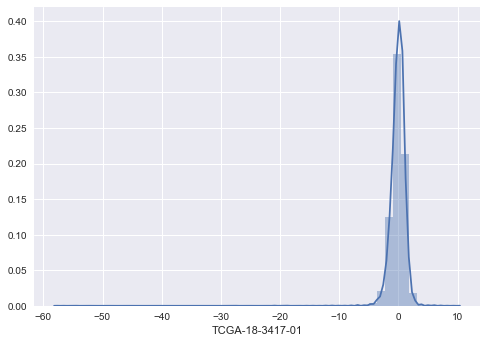

In [49]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

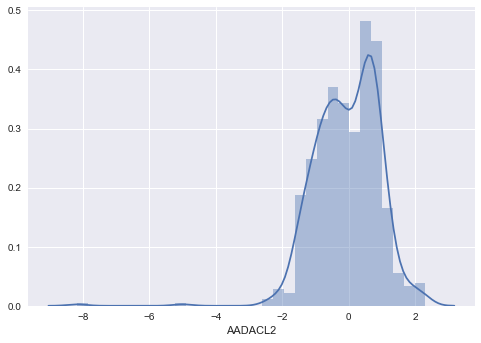

In [50]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [51]:
filename = path+'tcga_lusc_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [52]:
gene_list = mf.createGeneList(normalized_matrix)

In [53]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [54]:
gene_list.shape

(18608, 2)

# Save Gene List

In [55]:
filename = path+'tcga_lusc_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [56]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [57]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [58]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-18-3406-01,67,MALE,M0,N0,T1,Stage IA,Lung Squamous Cell Carcinoma- Not Otherwise Sp...,Primary Solid Tumor,Lung,NaN
TCGA-18-3407-01,72,MALE,M0,N0,T2,Stage IB,Lung Squamous Cell Carcinoma- Not Otherwise Sp...,Primary Solid Tumor,Lung,NaN
TCGA-18-3408-01,77,FEMALE,M0,N0,T2,Stage IB,Lung Squamous Cell Carcinoma- Not Otherwise Sp...,Primary Solid Tumor,Lung,NaN
TCGA-18-3409-01,74,MALE,M0,N0,T1,Stage IA,Lung Basaloid Squamous Cell Carcinoma,Primary Solid Tumor,Lung,NaN
TCGA-18-3410-01,81,MALE,M0,N0,T3,Stage IIB,Lung Squamous Cell Carcinoma- Not Otherwise Sp...,Primary Solid Tumor,Lung,NaN


In [59]:
attribute_list.shape

(552, 10)

# Save Attribute List

In [60]:
filename = path+'tcga_lusc_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [61]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [62]:
standard_matrix.head()

,TCGA-18-3406-01,TCGA-18-3407-01,TCGA-18-3408-01,TCGA-18-3409-01,TCGA-18-3410-01,TCGA-18-3411-01,TCGA-18-3412-01,TCGA-18-3414-01,TCGA-18-3415-01,TCGA-18-3416-01,...,TCGA-NK-A5CX-01,TCGA-NK-A5D1-01,TCGA-NK-A7XE-01,TCGA-O2-A52N-01,TCGA-O2-A52Q-01,TCGA-O2-A52S-01,TCGA-O2-A52V-01,TCGA-O2-A52W-01,TCGA-O2-A5IB-01,TCGA-XC-AA0X-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.768160,0.347655,0.235341,-0.652116,-0.119722,-0.764374,0.826181,-0.322560,0.539739,0.641261,...,0.115767,-0.775274,0.525215,-0.155936,0.391158,-0.485526,-0.253768,0.478115,-0.282723,-0.691939
A1CF,0.938512,0.093868,-0.757326,0.496076,-0.065528,-0.952853,-0.058262,-0.999773,0.767987,0.325779,...,-0.760939,-0.500186,0.695469,0.242423,0.372884,0.942125,0.949378,0.931244,0.884025,-0.101794
A2M,-0.202704,0.315377,0.347950,0.677814,-0.506968,-0.590269,-0.557644,-0.532300,-0.601139,-0.427296,...,-0.043322,-0.249851,-0.984929,-0.061431,-0.202704,-0.564889,-0.296902,-0.318662,0.666917,0.496536
A2ML1,-0.235984,0.387145,-0.239621,-0.981988,0.329172,-0.478674,0.633652,0.216837,0.350907,-0.199764,...,-0.138214,-0.793716,0.513984,-0.355534,-0.851697,-0.699585,0.912886,0.974589,-0.605416,0.916508
A3GALT2,0.866240,0.376844,-0.536034,-0.213692,0.101456,0.703060,-0.351340,-0.872880,0.496423,0.735696,...,-0.637452,-0.304288,-0.579526,0.079729,0.409426,-0.148523,-0.018106,-0.644708,0.993230,-0.057926


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

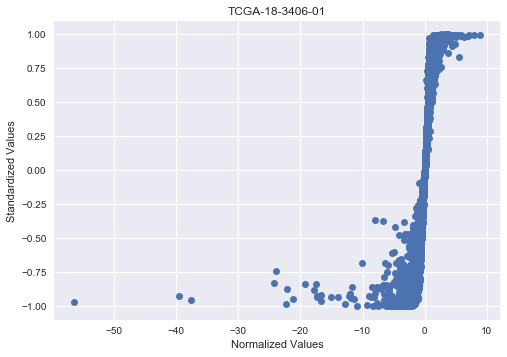

In [63]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [64]:
filename = path+'tcga_lusc_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [65]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [66]:
tertiary_matrix.head()

,TCGA-18-3406-01,TCGA-18-3407-01,TCGA-18-3408-01,TCGA-18-3409-01,TCGA-18-3410-01,TCGA-18-3411-01,TCGA-18-3412-01,TCGA-18-3414-01,TCGA-18-3415-01,TCGA-18-3416-01,...,TCGA-NK-A5CX-01,TCGA-NK-A5D1-01,TCGA-NK-A7XE-01,TCGA-O2-A52N-01,TCGA-O2-A52Q-01,TCGA-O2-A52S-01,TCGA-O2-A52V-01,TCGA-O2-A52W-01,TCGA-O2-A5IB-01,TCGA-XC-AA0X-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,-1,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
A2ML1,0,0,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Save Teriary Matrix

In [67]:
filename = path+'tcga_lusc_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [68]:
name = 'tcga_lusc_gene_up_set'

In [69]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [70]:
name = 'tcga_lusc_gene_down_set'

In [71]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [72]:
name = 'tcga_lusc_attribute_up_set'

In [73]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [74]:
name = 'tcga_lusc_attribute_down_set'

In [75]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [76]:
attribute_normalized_matrix = normalized_matrix.copy()

In [77]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [78]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [79]:
attribute_similarity_matix.head()

,"(Donor:TCGA-18-3406, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3407, Age:72.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3408, Age:77.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3409, Age:74.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Lung Basaloid Squamous Cell Carcinoma, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3410, Age:81.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3411, Age:63.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3412, Age:52.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3414, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3415, Age:77.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-18-3416, Age:83.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Lung Squamous Cell Carcinoma- Not Otherwise Specified (NOS), Tissue:Lung, Tumor:nan, Gradenan)",...,"(Donor:TCGA-NK-A5CX, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-NK-A5D1, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Small Cell Squamous Cell, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-NK-A7XE, Age:66.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-O2-A52N, Age:78.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-O2-A52Q, Age:44.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-O2-A52S, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-O2-A52V, Age:75.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-O2-A52W, Age:63.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-O2-A5IB, Age:71.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)","(Donor:TCGA-XC-AA0X, Age:77.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Squamous Cell Carcinoma, Not Otherwise Specified, Tissue:Lung, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-18-3406, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Lung Squamous Cell Carc

# Save Attribute Similarity Matrix

In [80]:
filename = path+'tcga_lusc_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [81]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [82]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [83]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.049755,-0.205545,0.026359,0.081366,0.057659,-0.013176,-0.106891,0.115473,0.032731,...,0.108796,0.114774,-0.069878,-0.030505,-0.113694,-0.038459,-0.087600,-0.074652,-0.235664,-0.012370
A1CF,0.049755,1.000000,-0.101777,-0.071983,0.062224,-0.065383,0.109199,0.116365,0.053770,0.022559,...,0.097928,0.110711,-0.083817,0.048359,0.027423,0.120390,-0.018293,-0.195266,0.046458,-0.061872
A2M,-0.205545,-0.101777,1.000000,-0.414030,-0.090226,-0.250793,0.023654,-0.302902,-0.281977,-0.003869,...,-0.671652,-0.675467,-0.086306,-0.096881,-0.312423,-0.381386,0.332771,0.538048,0.411035,-0.132544
A2ML1,0.026359,-0.071983,-0.414030,1.000000,0.011138,0.421028,-0.132563,0.128878,0.287057,0.119949,...,0.402346,0.364764,0.010878,-0.069652,0.261752,0.190855,-0.305787,-0.178041,-0.160546,0.095733
A3GALT2,0.081366,0.062224,-0.090226,0.011138,1.000000,-0.053268,0.016050,0.034175,-0.018721,-0.066406,...,0.121447,0.130996,-0.024072,-0.011060,0.024061,0.061925,-0.008101,-0.014913,-0.078003,0.081312


# Save Gene Similarity Matrix

In [84]:
filename = path+'tcga_lusc_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [85]:
name = 'tcga_lusc_gene_attribute_edge_list'

In [86]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  552 Out of 552   

 The number of statisticaly relevent gene-attribute associations is: 513287
